In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('HR_Analytics_Kaggle.csv')

In [3]:
data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [4]:
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data['city'] = data['city'].apply(lambda x: x.split("_")[1])

In [7]:
data.drop(columns='enrollee_id',inplace = True)

In [8]:
data['relevent_experience'].replace({"Has relevent experience":1,"No relevent experience":0},inplace = True)

In [9]:
data['education_level'].replace({'Primary School':1,'High School':2,'Graduate':3,'Masters':4,'Phd':5},inplace = True)

In [10]:
data['experience'].replace({'<1':0,'>20':21},inplace = True)

In [11]:
data['experience'] = data.groupby('relevent_experience')['experience'].transform(lambda x : x.fillna(x.median()))

In [15]:
data

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,103,0.920,Male,1,no_enrollment,3.0,STEM,21,NaN,NaN,1,36,1.0
1,40,0.776,Male,0,no_enrollment,3.0,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,21,0.624,NaN,0,Full time course,3.0,STEM,5,NaN,NaN,never,83,0.0
3,115,0.789,NaN,0,NaN,3.0,Business Degree,0,NaN,Pvt Ltd,never,52,1.0
4,162,0.767,Male,1,no_enrollment,4.0,STEM,21,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,173,0.878,Male,0,no_enrollment,3.0,Humanities,14,NaN,NaN,1,42,1.0
19154,103,0.920,Male,1,no_enrollment,3.0,STEM,14,NaN,NaN,4,52,1.0
19155,103,0.920,Male,1,no_enrollment,3.0,STEM,21,50-99,Pvt Ltd,4,44,0.0
19156,65,0.802,Male,1,no_enrollment,2.0,NaN,0,500-999,Pvt Ltd,2,97,0.0


In [13]:
data.isna().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                   0
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
# data.groupby('city')['gender'].agg(pd.Series.mode)

In [17]:
data['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [18]:
data['enrolled_university'].isna().sum()

386

In [19]:
data['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [20]:
data['last_new_job'].replace({'>4':5,'never':0},inplace=True)

In [21]:
data['last_new_job'].value_counts()

1    8040
5    3290
2    2900
0    2452
4    1029
3    1024
Name: last_new_job, dtype: int64

In [35]:
data['last_new_job'].isna().sum()

423

In [36]:
data['training_hours'].value_counts()

28     329
12     292
18     291
22     282
50     279
      ... 
266      6
234      5
272      5
286      5
238      4
Name: training_hours, Length: 241, dtype: int64

In [56]:
data.groupby('training_hours')['last_new_job'].value_counts()

training_hours  last_new_job
1               1                5
                0                2
                2                1
                3                1
2               1               40
                                ..
334             4                1
336             1                7
                2                2
                0                1
                4                1
Name: last_new_job, Length: 1316, dtype: int64

In [57]:
data.groupby('training_hours')['last_new_job'].median().astype(int)

training_hours
1      1
2      1
3      1
4      1
5      1
      ..
328    1
330    1
332    1
334    1
336    1
Name: last_new_job, Length: 241, dtype: int32

In [62]:
data['last_new_job']= data.groupby('training_hours')['last_new_job'].transform(lambda x: x.fillna(x.median().astype(int)))

In [63]:
data.isna().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                   0
company_size              5938
company_type              6140
last_new_job                 0
training_hours               0
target                       0
last_new_job_1               0
dtype: int64

In [65]:
from sklearn.impute import KNNImputer

In [71]:
impute = KNNImputer(n_neighbors=3)

In [72]:
data_gender = data[['city', 'gender']]

In [69]:
data_gender[data_gender['gender'].isna()]

,city,gender
2,21,NaN
3,115,NaN
5,176,NaN
9,103,NaN
10,21,NaN
...,...,...
19140,103,NaN
19144,21,NaN
19145,44,NaN
19148,21,NaN


In [75]:
data_gender

,city,gender
0,103,Male
1,40,Male
2,21,NaN
3,115,NaN
4,162,Male
...,...,...
19153,173,Male
19154,103,Male
19155,103,Male
19156,65,Male


In [77]:
data_gender.dtypes

city      object
gender    object
dtype: object

In [78]:
data_gender.isna().sum()

city         0
gender    4508
dtype: int64

In [82]:
data.isna().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                   0
company_size              5938
company_type              6140
last_new_job                 0
training_hours               0
target                       0
last_new_job_1               0
dtype: int64

In [83]:
import numpy as np

In [86]:
data.select_dtypes(include = np.number)

,city,city_development_index,relevent_experience,education_level,training_hours,target
0,103,0.920,1,3.0,36,1.0
1,40,0.776,0,3.0,47,0.0
2,21,0.624,0,3.0,83,0.0
3,115,0.789,0,3.0,52,1.0
4,162,0.767,1,4.0,8,0.0
...,...,...,...,...,...,...
19153,173,0.878,0,3.0,42,1.0
19154,103,0.920,1,3.0,52,1.0
19155,103,0.920,1,3.0,44,0.0
19156,65,0.802,1,2.0,97,0.0


In [85]:
data['city']=data['city'].astype(int)

In [100]:
data['company_size'].unique()

array([nan,  3.,  1.,  8.,  7.,  6.,  2.,  4.,  5.])

In [90]:
data['company_size'].replace({'<10':1,'10/49':2,'50-99':3,'100-500':4,'500-999':5,'1000-4999':6,'5000-9999':7,'10000+':8},inplace=True)

In [101]:
data['company_size'].isna().sum()

5938

In [105]:
data['company_size'].mode()[0]

3.0

In [104]:
data['company_type'].mode()[0]

'Pvt Ltd'

In [106]:
data.groupby('company_size')['company_type'].value_counts()

company_size  company_type       
1.0           Pvt Ltd                 728
              Early Stage Startup     286
              Funded Startup          144
              NGO                      36
              Public Sector            35
              Other                    14
2.0           Pvt Ltd                 910
              Funded Startup          193
              Early Stage Startup     176
              Public Sector            43
              NGO                      32
              Other                    12
3.0           Pvt Ltd                2151
              Funded Startup          390
              Public Sector           116
              Early Stage Startup     109
              NGO                      77
              Other                    18
4.0           Pvt Ltd                1833
              Funded Startup          214
              NGO                     174
              Public Sector           151
              Early Stage Startup      27


In [107]:
 data['company_size'].fillna('Pvt Ltd',inplace = True)

In [108]:
data['company_size'].isna().sum()

0

In [109]:
data.groupby('company_type')['company_size'].value_counts()

company_type         company_size
Early Stage Startup  1.0              286
                     2.0              176
                     3.0              109
                     4.0               27
                     Pvt Ltd            3
                     5.0                2
Funded Startup       3.0              390
                     4.0              214
                     2.0              193
                     1.0              144
                     5.0               54
                     Pvt Ltd            6
NGO                  4.0              174
                     3.0               77
                     6.0               73
                     5.0               37
                     8.0               37
                     1.0               36
                     2.0               32
                     7.0               29
                     Pvt Ltd           26
Other                4.0               20
                     3.0               18


In [121]:
data.loc[data['company_size']=='Pvt Ltd','company_size']=0

In [122]:
data['company_size'].isna().sum()

0

In [123]:
data.groupby('company_size')['company_type'].value_counts()

company_size  company_type       
0.0           Pvt Ltd                 406
              Public Sector           129
              NGO                      26
              Other                     8
              Funded Startup            6
              Early Stage Startup       3
1.0           Pvt Ltd                 728
              Early Stage Startup     286
              Funded Startup          144
              NGO                      36
              Public Sector            35
              Other                    14
2.0           Pvt Ltd                 910
              Funded Startup          193
              Early Stage Startup     176
              Public Sector            43
              NGO                      32
              Other                    12
3.0           Pvt Ltd                2151
              Funded Startup          390
              Public Sector           116
              Early Stage Startup     109
              NGO                      77


In [124]:
data['company_type'].fillna('Pvt Ltd',inplace = True)

In [125]:
data['company_type'].isna().sum()

0

In [127]:
data.isna().sum()

city                          0
city_development_index        0
gender                     4508
relevent_experience           0
enrolled_university         386
education_level             460
major_discipline           2813
experience                    0
company_size                  0
company_type                  0
last_new_job                  0
training_hours                0
target                        0
last_new_job_1                0
company_size_1            19158
dtype: int64

In [130]:
data.drop(columns='last_new_job_1',inplace= True)

In [131]:
data.drop(columns='company_size_1',inplace= True)

In [132]:
data.isna().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                   0
company_size                 0
company_type                 0
last_new_job                 0
training_hours               0
target                       0
dtype: int64

In [134]:
data['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [135]:
data['education_level'].unique()

array([ 3.,  4.,  2., nan,  5.,  1.])

In [136]:
data['education_level'].fillna(0,inplace= True)

In [137]:
data.isna().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level              0
major_discipline          2813
experience                   0
company_size                 0
company_type                 0
last_new_job                 0
training_hours               0
target                       0
dtype: int64

In [138]:
data['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [140]:
data['enrolled_university'].mode()[0]

'no_enrollment'

In [139]:
data.groupby('education_level')['enrolled_university'].value_counts()

education_level  enrolled_university
0.0              no_enrollment           270
                 Full time course         69
                 Part time course         21
1.0              no_enrollment           255
                 Full time course         33
                 Part time course         11
2.0              no_enrollment           940
                 Full time course        864
                 Part time course        166
3.0              no_enrollment          8434
                 Full time course       2209
                 Part time course        784
4.0              no_enrollment          3547
                 Full time course        557
                 Part time course        204
5.0              no_enrollment           371
                 Full time course         25
                 Part time course         12
Name: enrolled_university, dtype: int64

In [141]:
data['enrolled_university'].fillna('no_enrollment',inplace = True)

In [142]:
data.isna().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2813
experience                   0
company_size                 0
company_type                 0
last_new_job                 0
training_hours               0
target                       0
dtype: int64

In [143]:
data['major_discipline'].mode()[0]

'STEM'

In [144]:
data['major_discipline'].unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [145]:
data.groupby('enrolled_university')['major_discipline'].value_counts()

enrolled_university  major_discipline
Full time course     STEM                 2620
                     Other                  60
                     Humanities             43
                     Business Degree        26
                     No Major               19
                     Arts                   13
Part time course     STEM                  910
                     Humanities             27
                     Business Degree        19
                     Other                  18
                     No Major               13
                     Arts                   12
no_enrollment        STEM                10962
                     Humanities            599
                     Other                 303
                     Business Degree       282
                     Arts                  228
                     No Major              191
Name: major_discipline, dtype: int64

In [146]:
data['major_discipline'].fillna('STEM',inplace= True)

In [147]:
data.isna().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size                 0
company_type                 0
last_new_job                 0
training_hours               0
target                       0
dtype: int64

In [150]:
data.groupby('city')['gender'].value_counts().to_string()

'city  gender\n1     Male        23\n      Female       1\n2     Male         4\n      Female       1\n7     Male        16\n      Female       2\n8     Male         3\n      Female       1\n9     Male         8\n      Female       2\n10    Male        64\n      Other        5\n      Female       3\n11    Male       152\n      Female      10\n12    Male         9\n13    Male        33\n      Female       3\n14    Male        17\n      Female       2\n16    Male      1146\n      Female      96\n      Other       16\n18    Male         2\n      Female       1\n19    Male        70\n      Female      10\n      Other        1\n20    Male        16\n      Female       1\n21    Male      1562\n      Female     153\n      Other        8\n23    Male       127\n      Female      16\n      Other        1\n24    Male        41\n      Female       3\n      Other        1\n25    Male         2\n26    Male        19\n      Female       1\n27    Male        36\n28    Male       146\n      Other      

In [162]:
data.dropna(subset='gender',inplace = True)

In [163]:
data['gender'].isna().sum()

0

In [164]:
data.isna().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [165]:
data.select_dtypes(include= np.number)

,city,city_development_index,relevent_experience,education_level,training_hours,target
0,103,0.920,1,3.0,36,1.0
1,40,0.776,0,3.0,47,0.0
4,162,0.767,1,4.0,8,0.0
6,160,0.920,1,2.0,24,0.0
7,46,0.762,1,3.0,18,1.0
...,...,...,...,...,...,...
19152,103,0.920,1,3.0,25,0.0
19153,173,0.878,0,3.0,42,1.0
19154,103,0.920,1,3.0,52,1.0
19155,103,0.920,1,3.0,44,0.0


In [166]:
data

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,103,0.920,Male,1,no_enrollment,3.0,STEM,21,0,Pvt Ltd,1,36,1.0
1,40,0.776,Male,0,no_enrollment,3.0,STEM,15,3.0,Pvt Ltd,5,47,0.0
4,162,0.767,Male,1,no_enrollment,4.0,STEM,21,3.0,Funded Startup,4,8,0.0
6,160,0.920,Male,1,no_enrollment,2.0,STEM,5,3.0,Funded Startup,1,24,0.0
7,46,0.762,Male,1,no_enrollment,3.0,STEM,13,1.0,Pvt Ltd,5,18,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19152,103,0.920,Female,1,no_enrollment,3.0,Humanities,7,2.0,Funded Startup,1,25,0.0
19153,173,0.878,Male,0,no_enrollment,3.0,Humanities,14,0,Pvt Ltd,1,42,1.0
19154,103,0.920,Male,1,no_enrollment,3.0,STEM,14,0,Pvt Ltd,4,52,1.0
19155,103,0.920,Male,1,no_enrollment,3.0,STEM,21,3.0,Pvt Ltd,4,44,0.0


In [169]:
gender_1 = pd.get_dummies(data['gender'])

In [170]:
gender_1

,Female,Male,Other
0,0,1,0
1,0,1,0
4,0,1,0
6,0,1,0
7,0,1,0
...,...,...,...
19152,1,0,0
19153,0,1,0
19154,0,1,0
19155,0,1,0


In [171]:
enrolled_university_1 = pd.get_dummies(data['enrolled_university'])

In [172]:
major_discipline_1 = pd.get_dummies(data['major_discipline'])

In [173]:
company_type_1 = pd.get_dummies(data['company_type'])

In [174]:
data_num = data.select_dtypes(include= np.number)

In [189]:
data_num = data_num.reset_index().drop(columns = 'index')
gender_1 = gender_1.reset_index().drop(columns = 'index')
enrolled_university_1 = enrolled_university_1.reset_index().drop(columns = 'index')
major_discipline_1 = major_discipline_1.reset_index().drop(columns = 'index')
company_type_1 = company_type_1.reset_index().drop(columns = 'index')

In [176]:
gender_1

,Female,Male,Other
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
14645,1,0,0
14646,0,1,0
14647,0,1,0
14648,0,1,0


In [192]:
data_new = pd.concat ([data_num,gender_1,enrolled_university_1,major_discipline_1,company_type_1],axis = 1)

In [193]:
data_new

,city,city_development_index,relevent_experience,education_level,training_hours,target,Female,Male,Other,Full time course,...,Humanities,No Major,Other,STEM,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
0,103,0.920,1,3.0,36,1.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,40,0.776,0,3.0,47,0.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,162,0.767,1,4.0,8,0.0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
3,160,0.920,1,2.0,24,0.0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,46,0.762,1,3.0,18,1.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14645,103,0.920,1,3.0,25,0.0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
14646,173,0.878,0,3.0,42,1.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
14647,103,0.920,1,3.0,52,1.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
14648,103,0.920,1,3.0,44,0.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [182]:
gender_1.index

RangeIndex(start=0, stop=14650, step=1)

In [183]:
data_num

,city,city_development_index,relevent_experience,education_level,training_hours,target
0,103,0.920,1,3.0,36,1.0
1,40,0.776,0,3.0,47,0.0
4,162,0.767,1,4.0,8,0.0
6,160,0.920,1,2.0,24,0.0
7,46,0.762,1,3.0,18,1.0
...,...,...,...,...,...,...
19152,103,0.920,1,3.0,25,0.0
19153,173,0.878,0,3.0,42,1.0
19154,103,0.920,1,3.0,52,1.0
19155,103,0.920,1,3.0,44,0.0


In [184]:
enrolled_university_1.index

RangeIndex(start=0, stop=14650, step=1)

In [185]:
major_discipline_1.index

RangeIndex(start=0, stop=14650, step=1)

In [186]:
company_type_1.index

RangeIndex(start=0, stop=14650, step=1)

# EDA

<Axes: xlabel='education_level', ylabel='Count'>

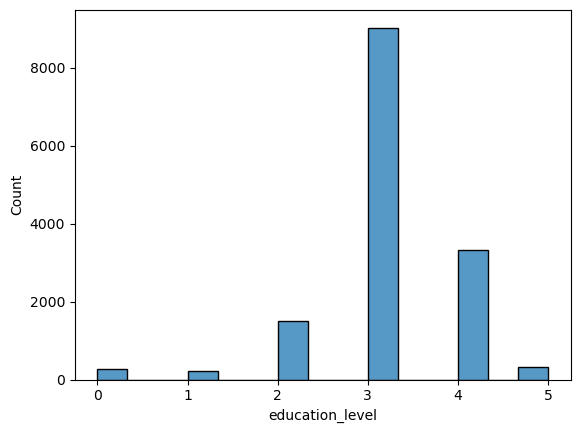

In [200]:
sns.histplot(data_new['education_level'])

In [201]:
data_new.dtypes

city                        int32
city_development_index    float64
relevent_experience         int64
education_level           float64
training_hours              int64
target                    float64
Female                      uint8
Male                        uint8
Other                       uint8
Full time course            uint8
Part time course            uint8
no_enrollment               uint8
Arts                        uint8
Business Degree             uint8
Humanities                  uint8
No Major                    uint8
Other                       uint8
STEM                        uint8
Early Stage Startup         uint8
Funded Startup              uint8
NGO                         uint8
Other                       uint8
Public Sector               uint8
Pvt Ltd                     uint8
dtype: object

city


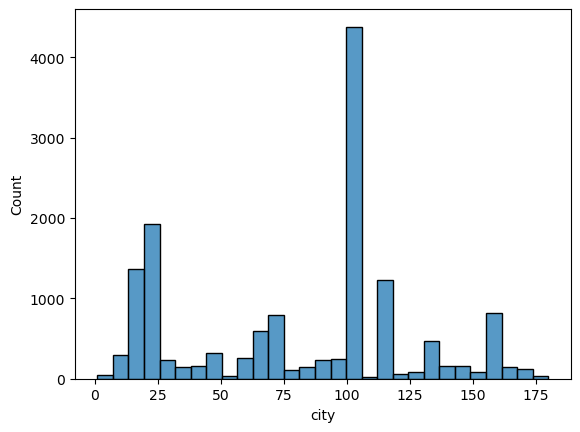

city_development_index


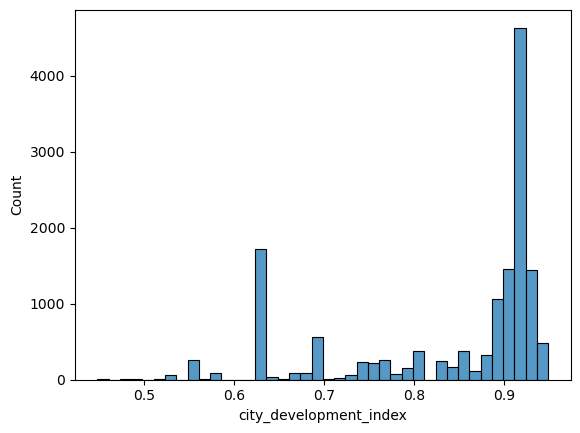

relevent_experience


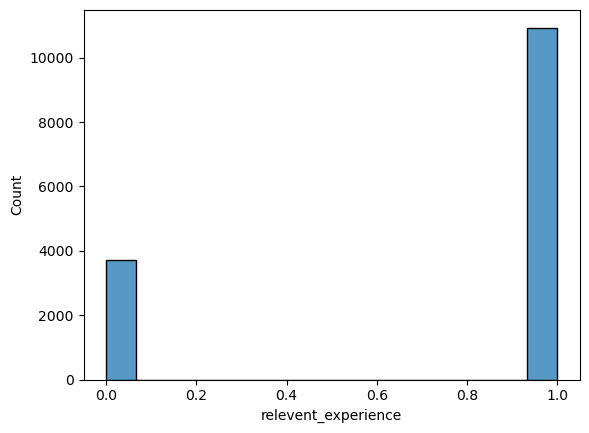

education_level


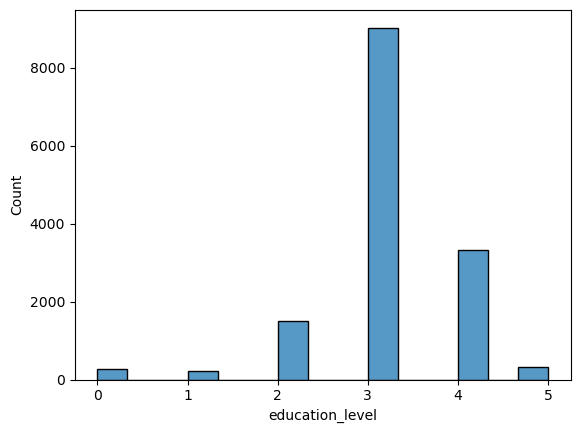

training_hours


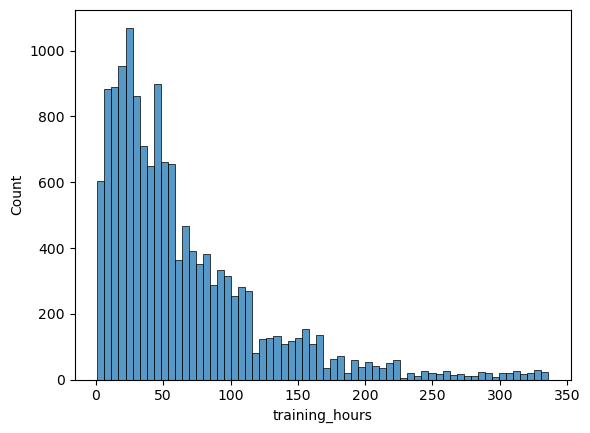

target


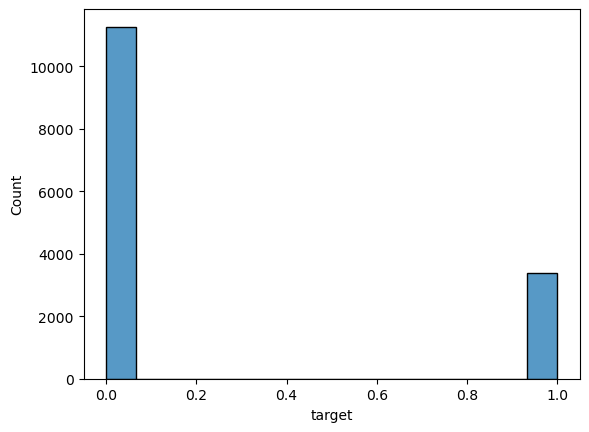

In [208]:
for col in data.select_dtypes(include = np.number).columns:
    print(col)
    sns.histplot(data[col])
    plt.show()
    

city


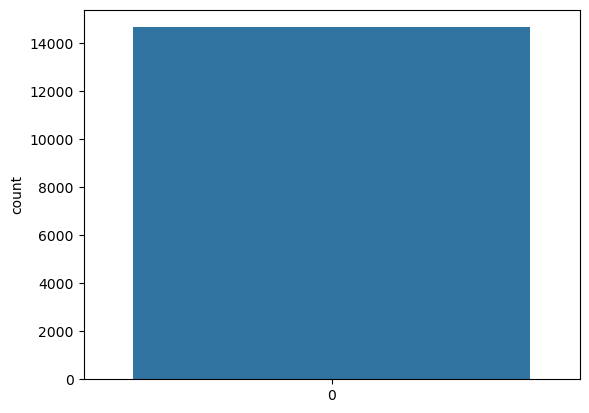

city_development_index


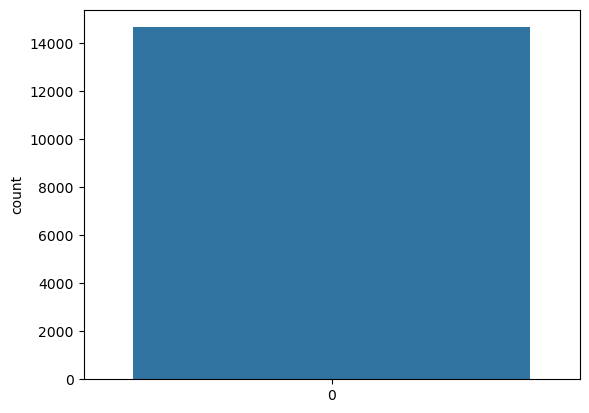

relevent_experience


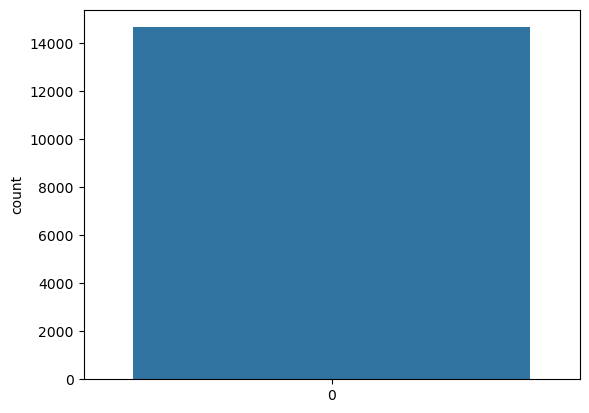

education_level


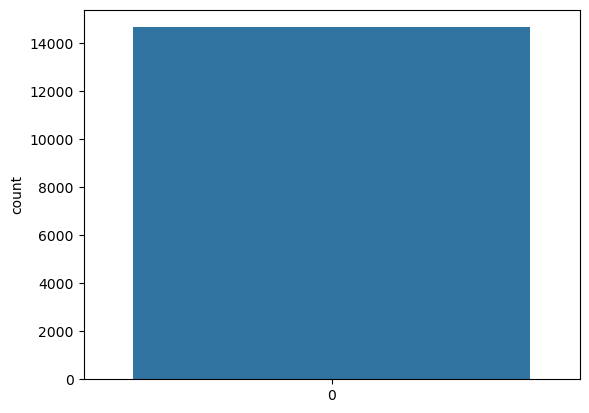

training_hours


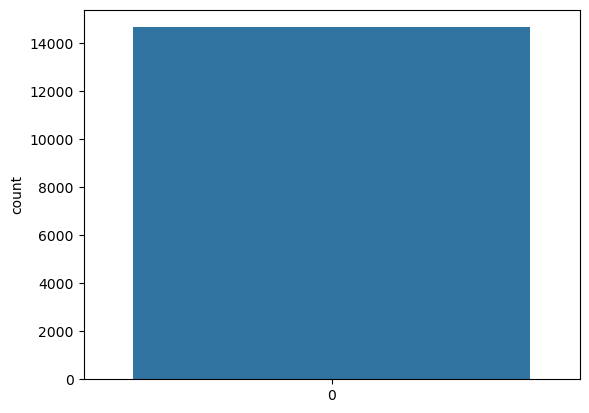

target


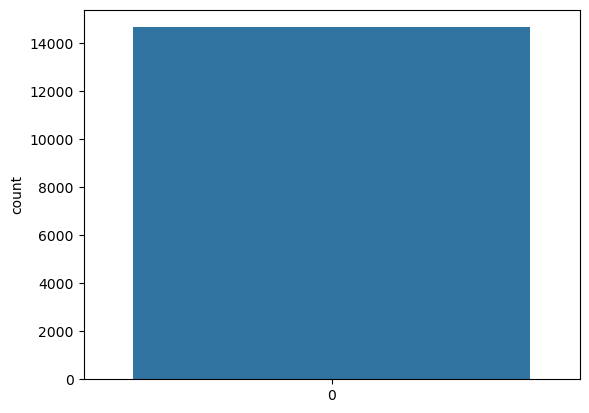

In [209]:
for col in data.select_dtypes(include = np.number).columns:
    print(col)
    sns.countplot(data[col])
    plt.show()

In [212]:
for col in data.select_dtypes(exclude = np.number).columns:
    print(col)
    plt.figure(figsize=(18,18))
    sns.countplot(data[col], order=data[col].value_counts().index)
    plt.show()

gender


ValueError: could not convert string to float: 'Male'

<Figure size 1800x1800 with 0 Axes>

In [213]:
data.select_dtypes(include = np.number).corr()

,city,city_development_index,relevent_experience,education_level,training_hours,target
city,1.000000,0.391097,-0.007045,0.014664,-0.004685,-0.121200
city_development_index,0.391097,1.000000,0.054321,0.036851,-0.001614,-0.318843
relevent_experience,-0.007045,0.054321,1.000000,0.225823,0.014118,-0.129990
education_level,0.014664,0.036851,0.225823,1.000000,-0.016857,-0.002580
training_hours,-0.004685,-0.001614,0.014118,-0.016857,1.000000,-0.017893
target,-0.121200,-0.318843,-0.129990,-0.002580,-0.017893,1.000000


<Axes: >

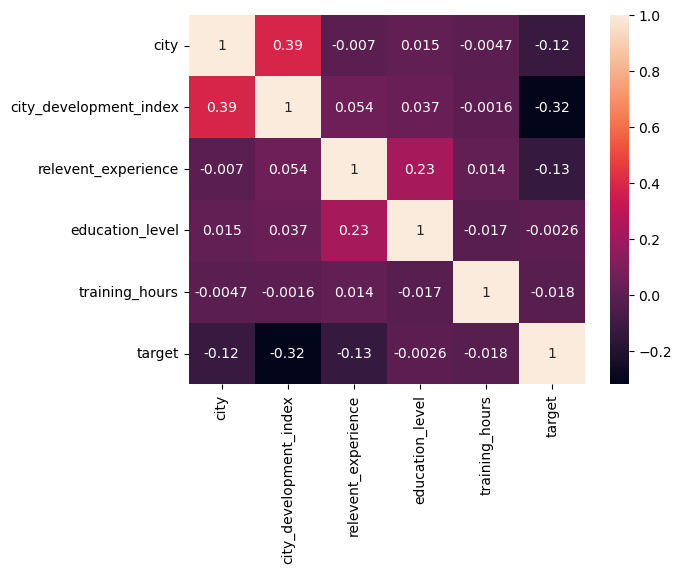

In [207]:
sns.heatmap(data.select_dtypes(include = np.number).corr(), annot=True)